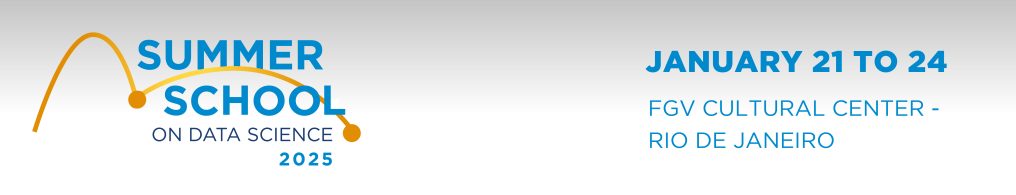

# FGV Summer School 2025
## Recommender Systems class 2 - Dataset split
Diego Galeano, Ph.D.

$\color{green}{\text{Before starting}}$ let's run the following cell to have all the required libraries for this notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
import os
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## The Movielens dataset

In [2]:
# Define the base path to your Google Drive
base_path = '/content/drive/My Drive/5. Teaching/FGV 2025/programming exercises/ml-100k/'
file_name = 'u.data'

# Construct the full file path
file_path = base_path + file_name

column_names = ['user_id', 'item_id', 'rating', 'time_stamp']
data = pd.read_csv(file_path, sep='\t', header=None, names=column_names )

# read also the item data
item_df = pd.read_csv(base_path + 'u.item', sep='|', encoding='latin-1', header=None)[[0,1,2]]
item_df.columns = ['item_id', 'movie_name', 'release_date']

data = data.merge(item_df, on = 'item_id')

In [3]:
data.head()

,user_id,item_id,rating,time_stamp,movie_name,release_date
0,196,242,3,881250949,Kolya (1996),24-Jan-1997
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997


# Split the dataset into training, validation and test sets

In [5]:
data.head()

,user_id,item_id,rating,time_stamp,movie_name,release_date
0,196,242,3,881250949,Kolya (1996),24-Jan-1997
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997


In [6]:
data_shuffled.head()

,user_id,item_id,rating,time_stamp,movie_name,release_date
0,877,381,4,882677345,Muriel's Wedding (1994),01-Jan-1994
1,815,602,3,878694269,"American in Paris, An (1951)",01-Jan-1951
2,94,431,4,891721716,Highlander (1986),01-Jan-1986
3,416,875,2,876696938,She's So Lovely (1997),22-Aug-1997
4,500,182,2,883873556,GoodFellas (1990),01-Jan-1990


In [4]:
valid_frac = 0.005  # % for validation
test_frac = 0.005  # % for testing
train_frac = 1- (valid_frac + test_frac)  # % for training

# Randomly shuffle the DataFrame
data_shuffled = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data
train_end = int(len(data) * train_frac)
valid_end = train_end + int(len(data) * valid_frac)

train_data = data_shuffled[:train_end]
valid_data = data_shuffled[train_end:valid_end]
test_data = data_shuffled[valid_end:]

# Print the sizes of each subset
print(f"Training Set: {len(train_data)} rows")
print(f"Validation Set: {len(valid_data)} rows")
print(f"Test Set: {len(test_data)} rows")

Training Set: 99000 rows
Validation Set: 500 rows
Test Set: 500 rows


### Building the rating matrix with the training data

In [9]:
# Build the rating matrix using only train_data
rating_matrix = train_data.pivot(index='user_id', columns='item_id', values='rating')

# Fill missing values with 0 (or any desired value like NaN)
rating_matrix = rating_matrix.fillna(0)

In [10]:
rating_matrix

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Random Recommender System and predict on validation and test data

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def generate_random_predictions(df, min_rating=1, max_rating=5, seed=42):
    np.random.seed(seed)  # Ensure reproducibility
    random_scores = np.random.uniform(low=min_rating, high=max_rating, size=len(df))
    return random_scores

# Generate random predictions for validation and test sets
valid_data['predicted_rating'] = generate_random_predictions(valid_data)
test_data['predicted_rating'] = generate_random_predictions(test_data)

<ipython-input-11-bb0dbfb519f0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['predicted_rating'] = generate_random_predictions(valid_data)
<ipython-input-11-bb0dbfb519f0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_rating'] = generate_random_predictions(test_data)


In [12]:
valid_data

,user_id,item_id,rating,time_stamp,movie_name,release_date,predicted_rating
99000,296,276,5,884198772,Leaving Las Vegas (1995),01-Jan-1995,2.498160
99001,654,121,4,887863757,Independence Day (ID4) (1996),03-Jul-1996,4.802857
99002,195,678,3,883295570,Volcano (1997),25-Apr-1997,3.927976
99003,3,344,4,889236939,"Apostle, The (1997)",18-Dec-1997,3.394634
99004,748,173,4,879454831,"Princess Bride, The (1987)",01-Jan-1987,1.624075
...,...,...,...,...,...,...,...
99495,897,670,3,879991258,Body Snatchers (1993),01-Jan-1993,2.413409
99496,207,319,3,879664891,Everyone Says I Love You (1996),06-Dec-1996,3.334624
99497,841,286,5,889066959,"English Patient, The (1996)",15-Nov-1996,1.310939
99498,694,1126,5,875727449,"Old Man and the Sea, The (1958)",01-Jan-1958,4.897579


In [ ]:
# Calculate RMSE and MAE for validation set
valid_rmse = np.sqrt(mean_squared_error(valid_data['rating'], valid_data['predicted_rating']))
valid_mae = mean_absolute_error(valid_data['rating'], valid_data['predicted_rating'])

# Calculate RMSE and MAE for test set
test_rmse = np.sqrt(mean_squared_error(test_data['rating'], test_data['predicted_rating']))
test_mae = mean_absolute_error(test_data['rating'], test_data['predicted_rating'])

# Print the results
print(f"Validation RMSE: {valid_rmse:.4f}")
print(f"Validation MAE: {valid_mae:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Validation RMSE: 1.6695
Validation MAE: 1.3511
Test RMSE: 1.7727
Test MAE: 1.4406


## Split per user for top-N Recommender Systems
Take only one item (selected at random) for each user, and place it on a test set dataframe.

In [13]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()

for i in set(data['user_id']):
  # extract information about user i
  df_user_i = data[data['user_id'] == i]

  # sample one item at random
  df_user_selected = df_user_i.sample(1)

  # save training and testing
  df_test = pd.concat([df_user_selected, df_test])
  df_train = pd.concat([df_train, df_user_i[df_user_i['item_id'] != df_user_selected['item_id'].values[0]]])

  break

In [14]:
df_user_i

,user_id,item_id,rating,time_stamp,movie_name,release_date
202,1,61,4,878542420,Three Colors: White (1994),01-Jan-1994
305,1,189,3,888732928,"Grand Day Out, A (1992)",01-Jan-1992
333,1,33,4,878542699,Desperado (1995),01-Jan-1995
334,1,160,4,875072547,Glengarry Glen Ross (1992),01-Jan-1992
478,1,20,4,887431883,Angels and Insects (1995),01-Jan-1995
...,...,...,...,...,...,...
92049,1,28,4,875072173,Apollo 13 (1995),01-Jan-1995
92487,1,172,5,874965478,"Empire Strikes Back, The (1980)",01-Jan-1980
94019,1,122,3,875241498,"Cable Guy, The (1996)",14-Jun-1996
96699,1,152,5,878542589,Sleeper (1973),01-Jan-1973


In [ ]:
df_test

,user_id,item_id,rating,time_stamp,movie_name,release_date
8737,1,209,4,888732908,This Is Spinal Tap (1984),01-Jan-1984


In [ ]:
df_train[df_train['item_id'] == 209]

,user_id,item_id,rating,time_stamp,movie_name,release_date
